<a href="https://colab.research.google.com/github/ElizaLo/ML-using-Jupiter-Notebook-and-Google-Colab/blob/master/Real%20Time%20Numbers%20Recognition/Real_Time_Numbers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real time numbers recognition (MNIST) on an iPhone with CoreML

##Importing the dataset with Keras and transformig it

In [0]:
import keras
from keras.datasets import mnist
from keras import backend as K
#from __future__ import absolute_import  
from keras.utils import to_categorical
from keras.utils import np_utils

# plot training images
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np


import tensorflow as tf

# defining the model
from keras.models import Model
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

In [0]:
def mnist_data():
    # input image dimensions
    img_rows, img_cols = 28, 28
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
        X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
        X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    # rescale [0,255] --> [0,1]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255

    # transform to one hot encoding
    Y_train = np_utils.to_categorical(Y_train, 10)
    Y_test = np_utils.to_categorical(Y_test, 10)

    return (X_train, Y_train), (X_test, Y_test)

(X_train, Y_train), (X_test, Y_test) = mnist_data()

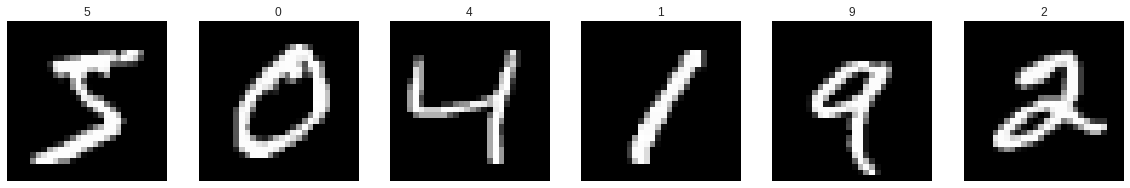

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

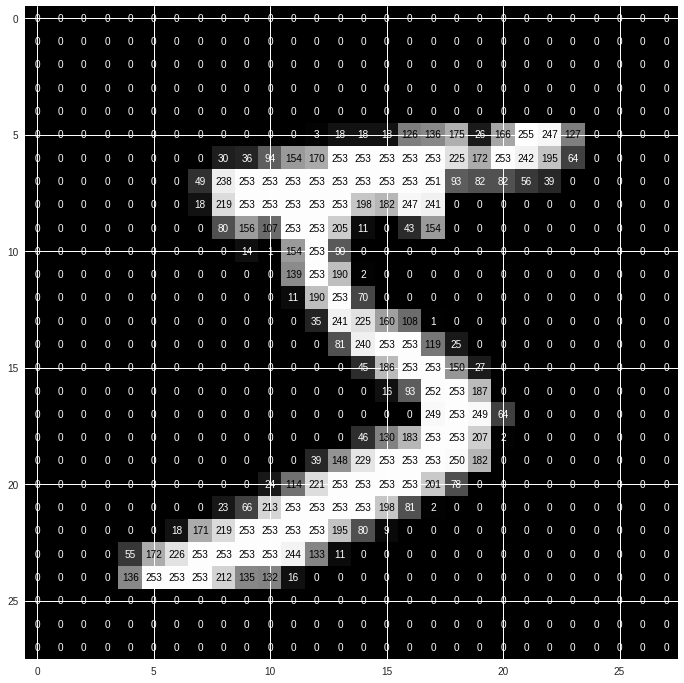

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [29]:
model = Sequential()
input_shape = (28, 28, 1)
num_classes = 10

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 32)          4128      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 3, 3, 32)          0         
__________

In [0]:
def network():
    model = Sequential()
    input_shape = (28, 28, 1)
    num_classes = 10

    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    # summarize the model
    model.summary()
    return model 

In [31]:
X_train.shape

(28, 60000, 28)

In [37]:
batch_size = 512
X_train=X_train.reshape(batch_size,28, 28,1)

ValueError: ignored

In [21]:
#Training the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# X_train = np.transpose(X_train, (0, 3, 1, 2))

model.fit(X_train, Y_train, batch_size = 512, epochs=6, verbose=1,validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: ignored